In [356]:
import numpy as np # type: ignore
from scipy.optimize import curve_fit # type: ignore
import matplotlib.pyplot as plt # type: ignore
import csv

In [357]:

def read_csv_file(filename):
  """Reads a CSV file with three columns and returns each column as a separate array.

  Args:
    filename: The name of the CSV file to read.

  Returns:
    A list of arrays, where each array represents a column in the CSV file, with the first element being the column name.
  """

  rows = []
  with open(filename, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
      rows.append(row)

  if len(rows[0]) != 3:
    raise ValueError("CSV file must have exactly 3 columns.")

  columns = [[] for _ in range(3)]
  for row in rows:
    for i in range(3):
      columns[i].append(float(row[i]))

  return columns

In [358]:
def write_data_to_csv(data, output_filename):
    """Writes a 2D array to a CSV file with a header row.

    Args:
        data: A 2D NumPy array containing the data.
        output_filename: The path to the output CSV file.
    """

    with open(output_filename, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(data)




In [359]:
def func(x, a, b, c, d):
    #return a * np.cos(c + x * b) + d
    return a*np.cos((x*b)+c)+d
    return d*(x**3)+a*(x**2)+b*x+c


def fit_model(theta_data, sensor_value_data):
    """Fits the model f(theta) = a*cos(c+(theta*b))+d to the data and returns the coefficients.

    Args:
        theta_data: A list of theta values.
        sensor_value_data: A list of sensor values.

    Returns:
        A tuple containing the calculated coefficients a, b, c, and d.
    """
    # Initial guess for coefficients
    p0 = [22, 0.03, 0.35, 22.45]

    # Fit the curve
    popt, _ = curve_fit(func, theta_data, sensor_value_data, p0)

    return popt


[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60.0, 62.0, 64.0, 66.0, 68.0, 70.0, 72.0, 74.0, 76.0, 78.0, 80.0, 82.0, 84.0, 86.0, 88.0, 90.0, 92.0, 94.0, 96.0, 98.0, 100.0, 102.0, 104.0, 106.0, 108.0, 110.0, 112.0, 114.0, 116.0, 118.0, 120.0, 122.0, 124.0, 126.0, 128.0, 130.0, 132.0, 134.0, 136.0, 138.0, 140.0, 142.0, 144.0, 146.0, 148.0, 150.0, 152.0, 154.0, 156.0, 158.0, 160.0, 162.0, 164.0, 166.0, 168.0, 170.0, 172.0, 174.0, 176.0, 178.0, 180.0, 182.0, 184.0, 186.0, 188.0, 190.0]
[43.288236250000004, 43.025495, 42.575614375, 42.091891875, 41.32284875, 40.496116875, 39.30034125, 38.108349375, 37.10223875, 35.758613125, 34.70465875, 33.5128775, 32.275115, 31.35659875, 29.7865175, 27.765614375, 26.366296249999998, 25.24605875, 23.94919375, 22.559134999999998, 21.822656249999998, 20.63665, 19.87284375, 18.28733125, 16.29620125, 14.7358425, 12.96223375, 11.909

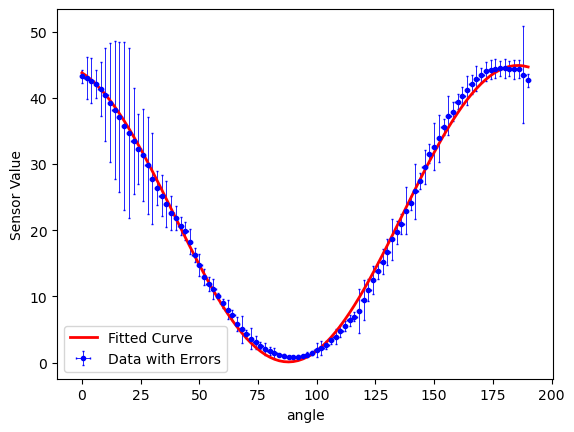

In [360]:
if __name__ == "__main__":
    
    theta_data, sensor_value_data,stdev =read_csv_file("OF_Proc.csv")

    a,b,c,d = fit_model(theta_data, sensor_value_data)
    Kstdev=10
    stdevS = [i * Kstdev for i in stdev]

    print(theta_data)
    print(sensor_value_data)
    print(stdev)

    print("Coefficients:")
    print("a =", a)
    print("b =", b)
    print("c =", c)
    print("d =", d)
 


    theta_plot = np.linspace(min(theta_data), max(theta_data), len(theta_data))
    sensor_value_pred = func(theta_plot, a,b,c,d)

    # Plot the data and the fitted curve
    #plt.scatter(theta_data,sensor_value_data)
    plt.errorbar(theta_data, sensor_value_data, xerr=1, yerr=stdevS, label="Data with Errors",fmt='bo', elinewidth=0.6, capsize=1,ms=3)
    plt.plot(theta_plot, sensor_value_pred, label="Fitted Curve", color='red',linewidth=2)
    plt.xlabel("angle")
    plt.ylabel("Sensor Value")
    plt.legend()
    plt.show()
  